In [2]:

import pandas as pd
import numpy as np
# For plotting quantile-quantile plt
import scipy.stats as stats 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [10]:
data=pd.read_csv("train.csv",usecols=['Age','Fare','Survived'])  #Selecting only 3 columns

In [11]:
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [9]:
data.isnull().sum()


Survived      0
Age         177
Fare          0
dtype: int64

In [12]:
data.fillna(data['Age'].mean(),inplace=True)

In [13]:
data.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [16]:
X=data.iloc[:,1:3]  #Selecting input columns

In [21]:
y=data.iloc[:,0] #Selecting target column

In [20]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

C:\Users\admin\AppData\Local\Temp\ipykernel_2756\1964855398.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


Text(0.5, 1.0, 'Age QQ plot')

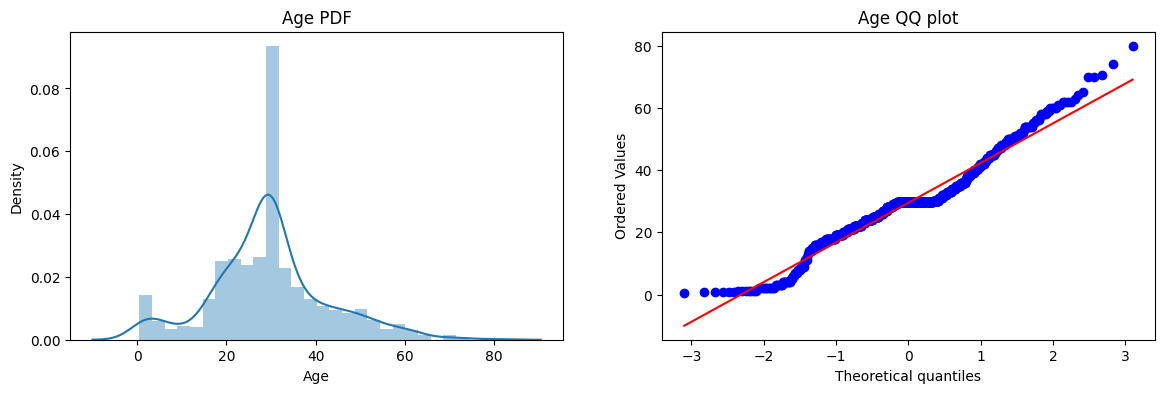

In [27]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')    #Probablity density function of age

plt.subplot(122)
stats.probplot(X_train['Age'],dist="norm",plot=plt)
plt.title('Age QQ plot')   #Quantile-Quantile function of age
# Looking at the QQ plot its can be called as normally distributed

C:\Users\admin\AppData\Local\Temp\ipykernel_2756\3271756570.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


Text(0.5, 1.0, 'Fare QQ plot')

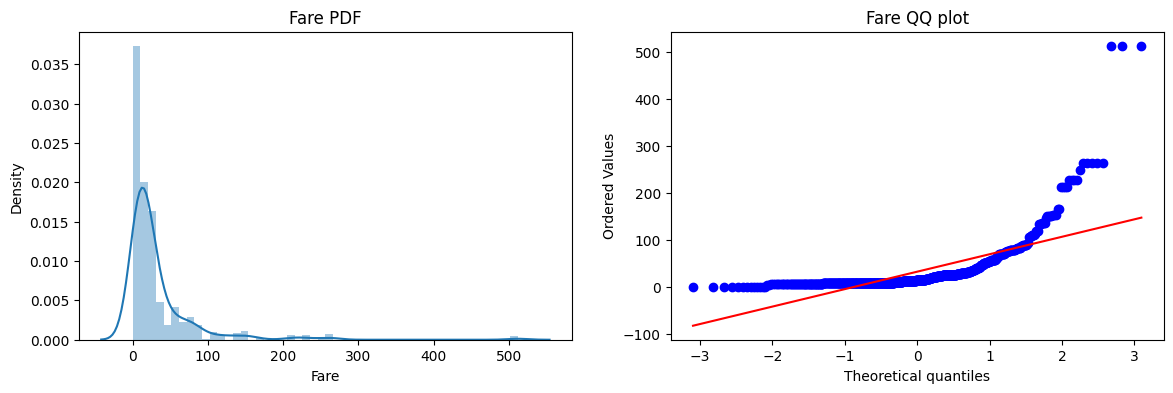

In [28]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare PDF')    #Probablity density function of Fare

plt.subplot(122)
stats.probplot(X_train['Fare'],dist="norm",plot=plt)
plt.title('Fare QQ plot')   #Quantile-Quantile function of Fare
# Looking at the QQ plot its can be called as normally distributed

In [29]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

In [30]:
clf

LogisticRegression()

In [33]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)

y_pred=clf.predict(X_test)
y_pred1=clf2.predict(X_test)

print("Accuracy of logistic Regression",accuracy_score(y_test,y_pred))
print("Accuracy of Decision Tree",accuracy_score(y_test,y_pred1))

Accuracy of logistic Regression 0.6480446927374302
Accuracy of Decision Tree 0.6759776536312849


In [39]:
# Applying Function transformer ..Here Log transformer
# logp computes natural logarithm and cannot handle zero while log1p computes log(1+x) allowing to handle zero and improving precision for small x


logtr=FunctionTransformer(func=np.log1p)

In [35]:
X_train_transformed=logtr.fit_transform(X_train)
X_test_transformer=logtr.fit_transform(X_test)

In [38]:
LR=LogisticRegression()
DT=DecisionTreeClassifier()

LR.fit(X_train_transformed,y_train)
DT.fit(X_train_transformed,y_train)

lr_pred=LR.predict(X_test_transformer)
dt_pred=LR.predict(X_test_transformer)

print("Accuracy after log Transfomer of Logistic Regression",accuracy_score(y_test,lr_pred))
print("Accuracy after log Transfomer of DT",accuracy_score(y_test,dt_pred))

Accuracy after log Transfomer of Logistic Regression 0.6815642458100558
Accuracy after log Transfomer of DT 0.6815642458100558


After applying log transformer the accuracy of Logistic Regression is increased whereas the accuracy of Decision Transformer is not much affected

In [40]:
# Now we are checking if our accuracy is actually increased or not by applying cross validation score
X_transformed=logtr.fit_transform(X)
cl=LogisticRegression()
cl2=DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(cl,X_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(cl2,X_transformed,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.6577153558052434


In [ ]:
# Plotting the Quantile Quantile plot of Fare before and after applying log transform
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Fare'],dist="norm",plot=plt)
plt.title("Fare before log transformer")